# Ejecicio
Deberás hacer uso de la imagen que se facilita. En ella se aprecian diferentes tipos de texturas
(circulares y trapezoidales). Deberás distinguir de forma automática y con algoritmos basados en
entropía y en procesamiento de imágenes el mayor número posible de texturas. Para ello, se aconseja
que sigan las siguientes tareas:
    
	• Implementar una función de entropía para imágenes, tal y como se ha descrito en la teoría.
	• Calcular esa entropía para conjuntos de píxeles de tamaño variable, comenzando por los de 3x3 píxeles.
	• Se repetirá el ejercicio para tamaños de 5x5 y 7x7.
	• Por último, se representará el resultado obtenido para cada tipo de conjunto y se ha de indicar una evaluación sobre si la entropía ayuda o facilita la extracción de características.


In [1]:
#Import matplotlib for easy plotting
import matplotlib
from matplotlib import pyplot as plt

# make matplotlib display figures as part of the notebook
%matplotlib inline

# Load libraries
import numpy as np
import skimage

# Load helper modules from skimage
from skimage import data, io 

# File operaitons
import os

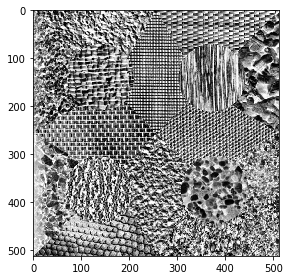

In [2]:
# Load an image from disk
image = io.imread(os.path.join('images', 'tema5_actividad.png'))


# Display the image
io.imshow(image)

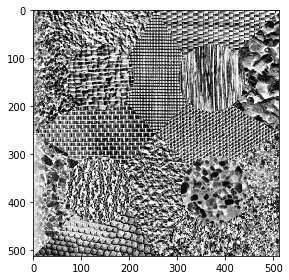

In [3]:
# Convert image to grayscale to make things easier
gimage = skimage.color.rgb2gray(image)
io.imshow(gimage)

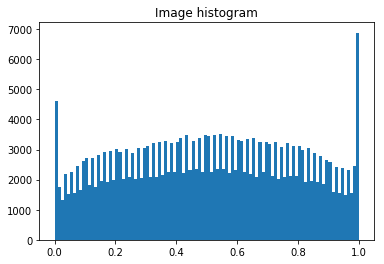

In [6]:
# Have a look at the histogram
plt.hist(gimage.ravel(), bins=100)
plt.title('Image histogram')
plt.show()

In [4]:
p, bins = np.histogram(gimage.data, bins=100+1, range=(0.0, 1.0), density=True)
p = p / 100.00

In [8]:
# The original grayscale image has a continous colour spectrum
gimage[0, 0:10]

array([0.        , 0.07058824, 0.50980392, 0.94117647, 0.99607843,
       0.91764706, 0.81568627, 0.45490196, 0.18823529, 0.26666667])

In [9]:
# Discetize the color values to be identical to the histogram bins, and use them as indices for the p array
dimg = np.round(gimage, decimals=2)
pos = (dimg * 100).astype(int)
pos[0, 0:10]

array([  0,   7,  51,  94, 100,  92,  82,  45,  19,  27])

In [10]:
# pimg ... is the image of probabilities for each pixel -> probability image
pimg = p[pos]

In [37]:
# apply func to a sliding window over the given image
def convolution(img, func, sw, keep_size=False):
    bw, bh = sw
    xb = int((bw-1)/2)
    yb = int((bh-1)/2)
    result = np.zeros(shape=img.shape)
    
    for yi in range(yb, img.shape[0]-yb):
        for xi in range(xb, img.shape[1]-xb):
            #print(xi, xb, yb)
            data = img[yi-yb:yi+yb+1, xi-xb:xi+xb+1]
            result[yi, xi] = func(data)
    
    if keep_size:
        return result
    else:
        return result[yb:-yb, xb:-xb]
        
# Calculate the entropy of a image subregion
def entropie(data):
    return np.sum(np.log(data)*data*-1)

# Normalize an images
def normalize(img):
    return (img - img.min())/img.max()

In [31]:
# Calculate the entropy pictures for different kernel sizes
kernels = [(3, 3), (5, 5), (7, 7)]
eimgs = []
for k in kernels:
    entropy_image = convolution(pimg, entropie, k)
    eimgs.append(normalize(entropy_image))

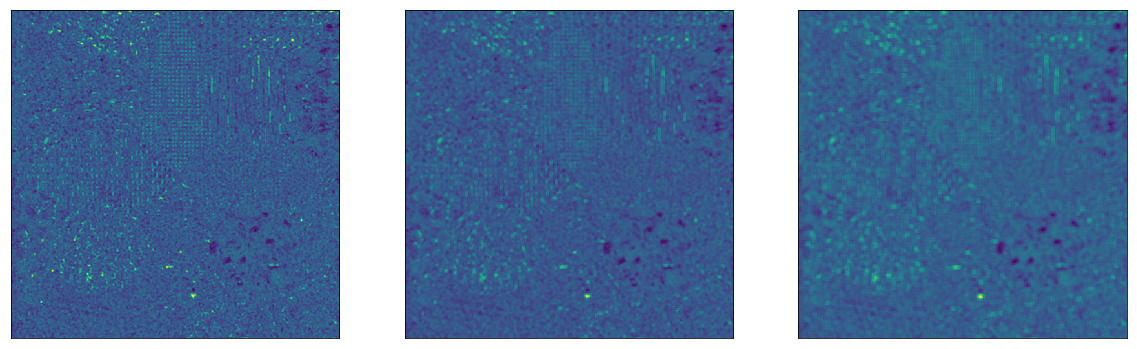

In [46]:
# Have a look at the entropy images
f, ax = plt.subplots(1, len(eimgs), figsize=(20, 20*len(eimgs)))
for a, img in zip(ax, eimgs):
    a.matshow(img)
    a.get_xaxis().set_visible(False)
    a.get_yaxis().set_visible(False)

In [34]:
fimg = convolution(eimgs[0], np.median, (7,7))

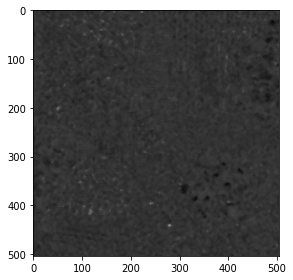

In [35]:
io.imshow(fimg)

In [ ]:
from skimage.morphology import watershed
from skimage.filters import sobel
elevation_map = sobel(eimgs[0])

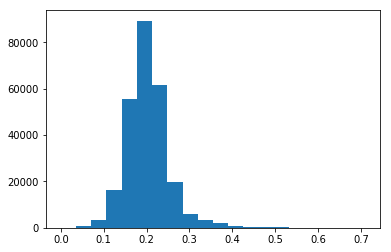

In [47]:
plt.hist(eimgs[0].ravel(), bins=20)
plt.show()

In [48]:
import skimage.exposure
t = skimage.exposure.equalize_adapthist(eimgs[0])

/Users/manuel.pasieka/anaconda3/envs/py3/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


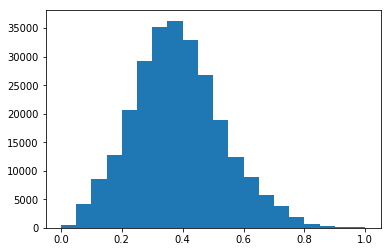

In [50]:
plt.hist(t.ravel(), bins=20)
plt.show()